In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [407]:
df = pd.read_csv('./train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [408]:
df.shape

(74051, 10)

In [409]:
df= pd.get_dummies(df)
df
y_train = df['Age']
y_train

0         9
1         8
2         9
3        11
4         8
         ..
74046    10
74047     6
74048    10
74049     8
74050     6
Name: Age, Length: 74051, dtype: int64

In [410]:
df['Sex_M'] =df['Sex_M'].astype(float)
df['Sex_F'] = df['Sex_F'].astype(float)
df['Sex_I'] = df['Sex_I'].astype(float)
df['Age'] = df["Age"].astype(float)
df.dtypes

id                  int64
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age               float64
Sex_F             float64
Sex_I             float64
Sex_M             float64
dtype: object

In [411]:
df.isnull().sum()

id                0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

In [412]:
df.duplicated().sum()

0

In [413]:
max_values = df.max()
max_values

id                74050.000000
Length                2.012815
Diameter              1.612500
Height                2.825000
Weight               80.101512
Shucked Weight       42.184056
Viscera Weight       21.545620
Shell Weight         28.491248
Age                  29.000000
Sex_F                 1.000000
Sex_I                 1.000000
Sex_M                 1.000000
dtype: float64

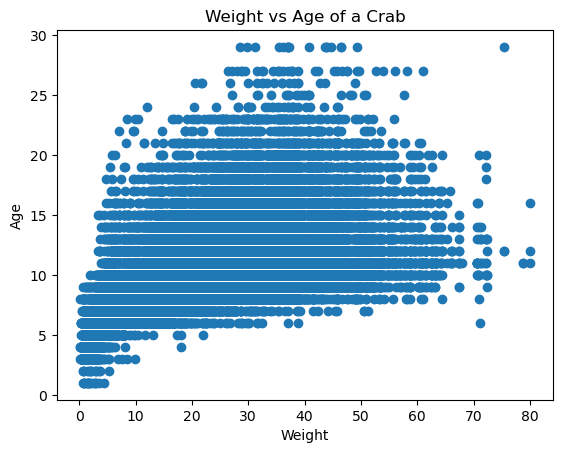

In [414]:
x=df['Weight']
y=df['Age']
plt.scatter(x, y)
plt.xlabel('Weight')
plt.ylabel('Age')
plt.title("Weight vs Age of a Crab")
plt.show()

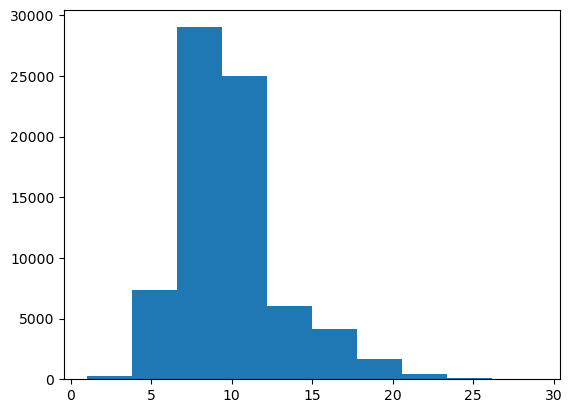

In [415]:
plt.hist(df['Age'], bins=10)
plt.show()

<Axes: xlabel='Sex_M', ylabel='Age'>

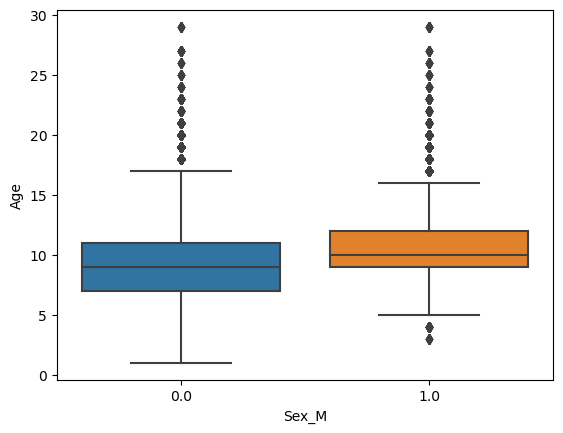

In [416]:
import seaborn as sns

sns.boxplot(x='Sex_M', y='Age', data=df)

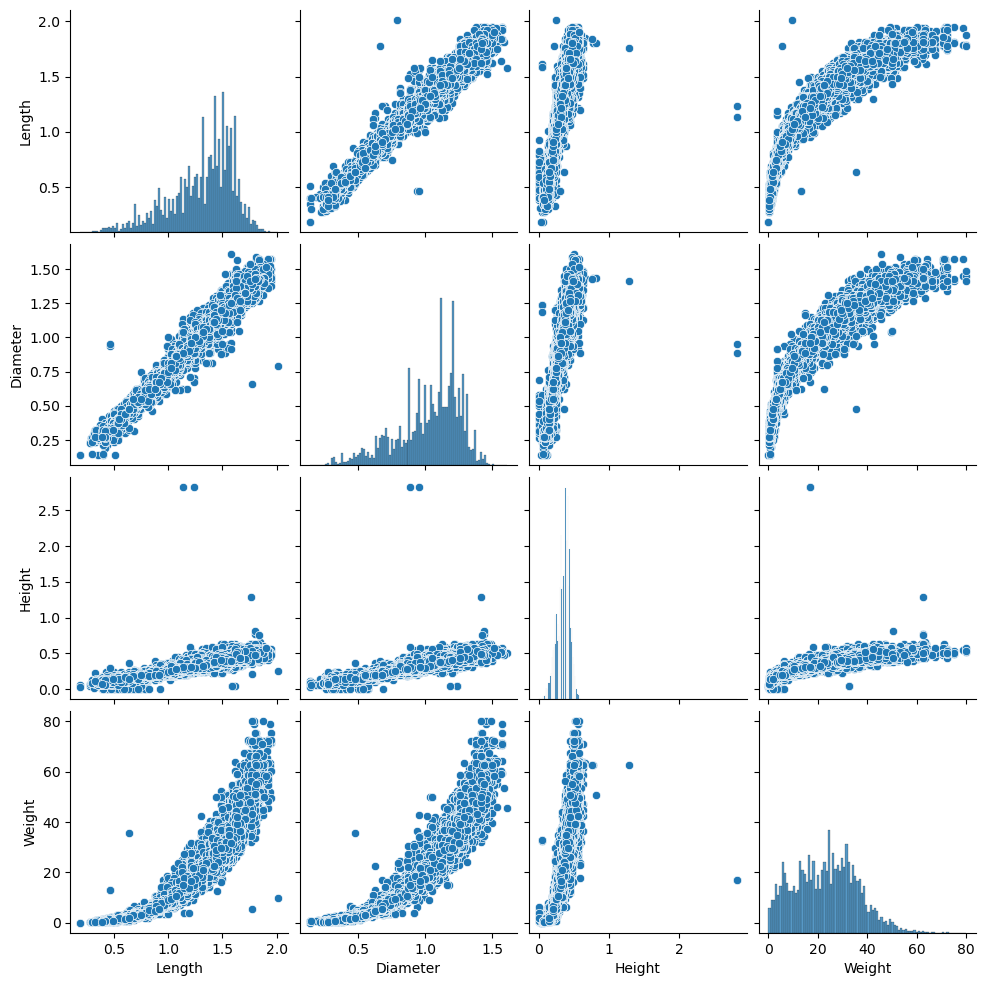

In [417]:
sns.pairplot(df[['Length', 'Diameter', 'Height', 'Weight']])

In [418]:
X_test= pd.read_csv('./test.csv')


X_train= df.drop('Age', axis=1)
X_train = X_train.drop('id', axis=1)

test_id = X_test['id']

X_test = X_test.drop('id', axis=1)
X_test = pd.get_dummies(X_test)

test_id

0         74051
1         74052
2         74053
3         74054
4         74055
          ...  
49363    123414
49364    123415
49365    123416
49366    123417
49367    123418
Name: id, Length: 49368, dtype: int64

In [388]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax_scaler = MinMaxScaler()

X_train_scale = minmax_scaler.fit_transform(X_train)
X_test_scale = minmax_scaler.transform(X_test)


In [389]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

In [390]:
model.fit(X_train_scale, y_train)

GradientBoostingRegressor()

In [399]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scale)
y_pred.shape

(49368,)

In [426]:
results = pd.DataFrame({'id':test_id, 'Age': y_pred})
results

,id,Age
0,74051,7.535236
1,74052,7.677237
2,74053,10.538679
3,74054,9.559605
4,74055,7.578894
...,...,...
49363,123414,9.386973
49364,123415,7.853720
49365,123416,12.608492
49366,123417,10.141038


In [427]:
results['Age'] = results['Age'].round()

results['Age'] = results['Age'].apply(lambda x: 10 if x > 10 else (0 if x < 0 else x))
results

,id,Age
0,74051,8.0
1,74052,8.0
2,74053,10.0
3,74054,10.0
4,74055,8.0
...,...,...
49363,123414,9.0
49364,123415,8.0
49365,123416,10.0
49366,123417,10.0


In [430]:
results.to_csv('submission.csv', index = False)